### **Linear Regression in Python**
---
In this tutorial we focus on the Regression task as discussed in the corresponding Lecture. 

We'll see how to create some dummy dataset using NumPy, how to visualize our dataset and how to fit it using both the built-in functions of scikit-learn as well as the a gradient based approach.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(1)

### **Data Creation**:
We use NumPy to create a vector of data points $x \in \mathbb{R}^{100}$ and a set of responses that are approximately linear.



[[ 0.        ]
 [ 0.1010101 ]
 [ 0.2020202 ]
 [ 0.3030303 ]
 [ 0.4040404 ]
 [ 0.50505051]
 [ 0.60606061]
 [ 0.70707071]
 [ 0.80808081]
 [ 0.90909091]
 [ 1.01010101]
 [ 1.11111111]
 [ 1.21212121]
 [ 1.31313131]
 [ 1.41414141]
 [ 1.51515152]
 [ 1.61616162]
 [ 1.71717172]
 [ 1.81818182]
 [ 1.91919192]
 [ 2.02020202]
 [ 2.12121212]
 [ 2.22222222]
 [ 2.32323232]
 [ 2.42424242]
 [ 2.52525253]
 [ 2.62626263]
 [ 2.72727273]
 [ 2.82828283]
 [ 2.92929293]
 [ 3.03030303]
 [ 3.13131313]
 [ 3.23232323]
 [ 3.33333333]
 [ 3.43434343]
 [ 3.53535354]
 [ 3.63636364]
 [ 3.73737374]
 [ 3.83838384]
 [ 3.93939394]
 [ 4.04040404]
 [ 4.14141414]
 [ 4.24242424]
 [ 4.34343434]
 [ 4.44444444]
 [ 4.54545455]
 [ 4.64646465]
 [ 4.74747475]
 [ 4.84848485]
 [ 4.94949495]
 [ 5.05050505]
 [ 5.15151515]
 [ 5.25252525]
 [ 5.35353535]
 [ 5.45454545]
 [ 5.55555556]
 [ 5.65656566]
 [ 5.75757576]
 [ 5.85858586]
 [ 5.95959596]
 [ 6.06060606]
 [ 6.16161616]
 [ 6.26262626]
 [ 6.36363636]
 [ 6.46464646]
 [ 6.56565657]
 [ 6.66666

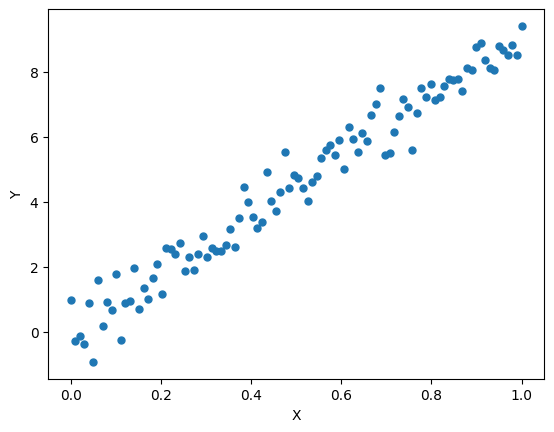

<Figure size 640x480 with 0 Axes>

In [2]:
# set the number of samples that we want to create
num_samples = 100 

# linspace returns a numpy array of evenly spaced points in the given interval.
# here we want num_samples points in the interval [0, 10]
# the [:, None] syntax "adds" a dimension to the vector
# thus from shape (100,) we get shape (100, 1). This helps with the computations.
x = np.linspace(0., 10., num_samples)[:, None]
print(x)

# generate the responses to the points 
# we have a linear relationship denoted by the first term and we add some 
# gaussian(0,1) distributed values to introduce some noise
y  = 0.9*x + 0.6*np.random.randn(num_samples, 1)
print(y)
# The true relationship between x and y is linear
z = 0.9*x

# normalize the values of x
# when possible it is better to have low values of the points for stability of the 
# learning algorithms
x /= x.max()

# We use matplotlib to plot the data. 
# Matplotlib follows the Matlab plot functions.
plt.plot(x,y, 'o', markersize = 5)

# set the labels of the axes
plt.xlabel('X')
plt.ylabel('Y')

# show the constructed plot
plt.show()

# you can use the savefig function to save the plot to a file
# pdf, eps, png, jpg and more options
plt.savefig('simple_data_without_line.pdf')

# clear the current figure
plt.clf()

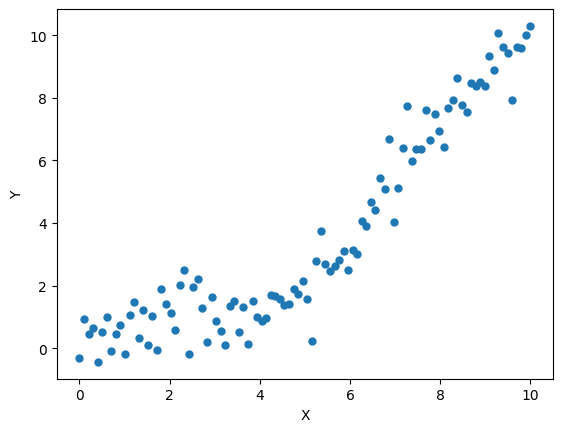

<Figure size 640x480 with 0 Axes>

In [3]:
# Create a more "complicated" response
num_samples = 100
x = np.linspace(0., 10.0, num_samples)[:, None]

# the responses now are produced by a combination of sin, a polynomial of x and random noise
y = 0.8*np.sin(x) + 0.1*x**2 + 0.7*np.random.randn(num_samples,1)

# normalize for stability
#x /= x.max()

# plot the data
plt.plot(x, y, 'o', markersize =5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
plt.clf()

### **Linear Regression**: *The easy way*
---
The easy way: Use the built-in functions of Scikit-learn.

Scikit-learn is a very useful tool specifically for Machine Learning.
It has many built-in functions for a variety of methods, such as Linear Regression, Classification, SVMs, GMMs, e.t.c.

However, it is not always best to use ready functions for some tasks. 
There may be stability issues for your dataset, it is usually difficult to obtain intermediate steps of the algorithm (if you need it), and they are usually very difficult to modify if you want to explore something apart from the standard implementation of a method.

Nevertheless they are very simple to use. 

In [4]:
!pip install -U scikit-learn

coeffs: 1.019638
bias/intercept: -1.497711


C:\Users\odys_\AppData\Local\Temp\ipykernel_14408\546132598.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('coeffs: %f'%coeffs)
C:\Users\odys_\AppData\Local\Temp\ipykernel_14408\546132598.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('bias/intercept: %f'%intercept)


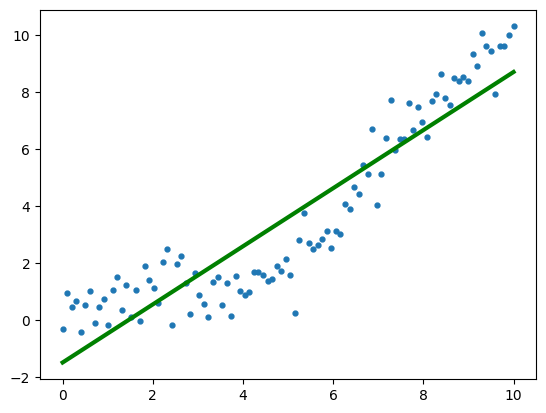

In [5]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(x,y)
coeffs = regression.coef_
intercept = regression.intercept_

print('coeffs: %f'%coeffs)
print('bias/intercept: %f'%intercept)

line = coeffs * x + intercept

plt.plot(x, y, '.', markersize = 7)
plt.plot(x, line, 'green', linewidth = 3)
plt.show()

### **Linear Regression**: *Implementing from scratch*
---
There are times where you want or should have access to the underlying estimation process in order to make modifications, store intermediate values or for any other reason. 

Thus, you can implement the fitting process by yourself.
In this case, implementing Linear Regression from the derivations of the coefficient estimates is quite simple.

**Reminder:**
We wish to $$min_{\hat{\beta}_0, \hat{\beta}_1}\sum(y_i - \hat{\beta}_0 - \hat{\beta}_1x_i)^2$$

By demanding the gradients to be zero, we get the colsed form solution:

$$\hat{\beta}_1 = \frac{\sum_{i=1}^N (x_iy_i - N\bar{x}\bar{y})}{\sum_{i=1}^Nx_i^2 - N\bar{x}^2}$$
$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}$$

coeffs: 0.259870
bias/intercept: 8.989991


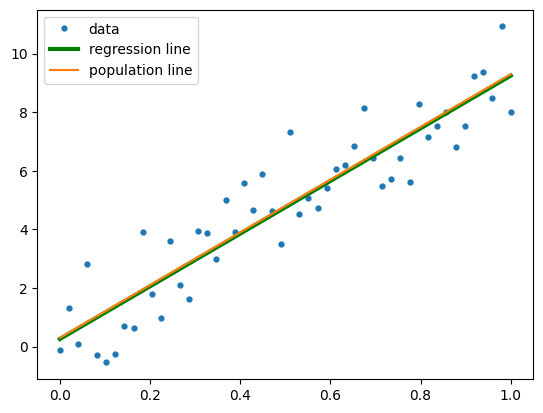

In [6]:
# set the number of samples that we want to create
num_samples = 50 

# linspace returns a numpy array of evenly spaced points in the given interval.
# here we want num_samples points in the interval [0, 10]
# the [:, None] syntax "adds" a dimension to the vector
# thus from shape (100,) we get shape (100, 1). This helps with the computations.
x = np.linspace(0., 10., num_samples)[:, None]

# generate the responses to the points 
# we have a linear relationship denoted by the first term and we add some 
# gaussian(0,1) distributed values to introduce some noise
y  = 0.9*x + 1.*np.random.randn(num_samples, 1) + 0.3

# The true relationship between x and y is linear
z = 0.9*x + 0.3

# normalize the values of x
# when possible it is better to have low values of the points for stability of the 
# learning algorithms
x /= x.max()

# define the function that computes the coefficient updates
# these where derived in the lecture
def coefficient_estimation(x,y):
  num_examples = x.shape[0]

  #compute the sample mean of x and y 
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  #for \hat{\beta}_1 we need to compute the cross deviation between x and y (numerator)
  # and the deviation of x (denominator)
  numerator = np.sum(y*x) - num_examples*y_mean*x_mean
  denominator = np.sum(x**2) - num_examples*x_mean*x_mean

  # then we can use the updates 
  b_1 = numerator / denominator
  b_0 = y_mean - b_1*x_mean

  return b_0, b_1

# we can use the coefficient_estimation function to compute the coeffs 
b_0, b_1 = coefficient_estimation(x, y)

print('coeffs: %f'%b_0)
print('bias/intercept: %f'%b_1)
# and plot 
line = b_1 * x + b_0

plt.plot(x, y, '.', markersize = 7)
plt.plot(x, line, 'green', linewidth = 3)
plt.plot(x, z)
plt.legend(['data', 'regression line', 'population line'])
#plt.savefig('population_regression_1.pdf', eps = 300)



## ***Linear Regression***: A more "complicated" way
---
There are cases, where the gradients of a loss function with respect to the considered variables
do not have a closed form solution. 

In this case, we can't use the updates in the previous section to update the parameters of the model.

At this point and since the task is considerably easy we can make a small intro  to the Stochastic Gradient Descent rationale, a core part of training more complex architectures, such as Neural Networks.

Usually, the computational libraries such as pytorch, have off-the-shelf functions to compute this but again if you want something more involved you need to at least know how it works.


## Gradient descent
---

1. Given an input vector $x$, claclulate the corresponding output $y$, based on weights (parameters) $w$
2. Calculate the loss function L
3. Update the parameters by substracting the gradient of the loss function with respect to the parameters:

$$w_{new} = w_{current} - \eta\frac{\partial{L}}{\partial{w_{current}}}$$

### Our case

$$L = \frac{(\hat{y} - y)^2}{N}$$

So, 

$$\frac{\partial{L}}{\partial{w}} = \frac{2}{N}(\hat{y} - y)x$$



In [7]:
# augment the data vector to include the bias
x = np.hstack((np.ones_like(x), x))

# split the data to train and test sets
perm_indices = np.random.permutation(len(x))

percentage = 0.8
inds_train = perm_indices[:int(percentage*len(x))]
inds_test = perm_indices[int(percentage*len(x)):]

test_x, test_y = x[inds_test,:], y[inds_test,:]
train_x, train_y = x[inds_train,:], y[inds_train,:]

In [8]:
def compute_gradient(x, y, w):
    y_hat = np.dot(x,w).flatten()
    
    residual = (y.flatten() - y_hat)
    gradient = -(2.0/len(x)) * np.dot(residual, x)
    
    error = np.mean(residual**2)
    return gradient, error

def apply_gradient(w,lr, gradient):
  return w - lr * gradient


In [9]:
# random initialization of the parameters
w = np.random.randn(2)
w_list = [w]

# the learning rate and the improvement tolerance
lr = 0.5
tolerance = 1e-5

# Perform Gradient Descent
max_steps = 10000
cur_step = 0

while cur_step<max_steps:
    gradient, error = compute_gradient(train_x, train_y, w)
    w_hat = apply_gradient(w, lr, gradient)
    
    # Convergence Condition
    if np.sum(abs(w_hat - w)) < tolerance:
        print("Converged at step %d."%(cur_step,))
        break
    
    # Print every 50 steps
    if cur_step % 50 == 0:
        print("Iteration: %d/%d - Error: %.4f" %(cur_step, max_steps, error))
    
    cur_step += 1
    w = w_hat
    w_list.append(w)

Iteration: 0/10000 - Error: 48.5112
Iteration: 50/10000 - Error: 1.2293
Iteration: 100/10000 - Error: 1.2206
Iteration: 150/10000 - Error: 1.2205
Converged at step 180.


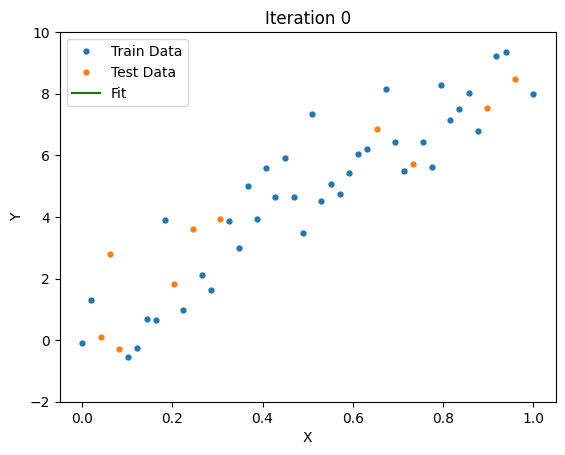

In [11]:
#x = x[:,1]
# plot the data
line = w[0] + w[1]*train_x[:,1]
import matplotlib.animation as animation
fig, ax = plt.subplots()
plt.plot(train_x[:,1], train_y, '.', markersize =7)
plt.plot(test_x[:,1], test_y, '.', markersize = 7)
l,  = plt.plot(train_x[:,1], line, 'green', markersize = 3)
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-2, 10)
plt.legend(['Train Data', 'Test Data', 'Fit'])
plt.title('Iteration 0')

def init():
  l.set_ydata([np.nan]*len(train_x[:,1]))
  return l,

def animate(i):
  if (i+1) % 25 == 0:
    l.set_ydata(w_list[i][0] + w_list[i][1]*train_x[:,1])
    plt.title('Iteration %d' %(i+1))
  return l,

line_ani = animation.FuncAnimation(fig, animate, init_func = init, interval = 20, blit=True, save_count=len(w_list))
# line_ani.save('fit.mp4')
plt.show()




ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

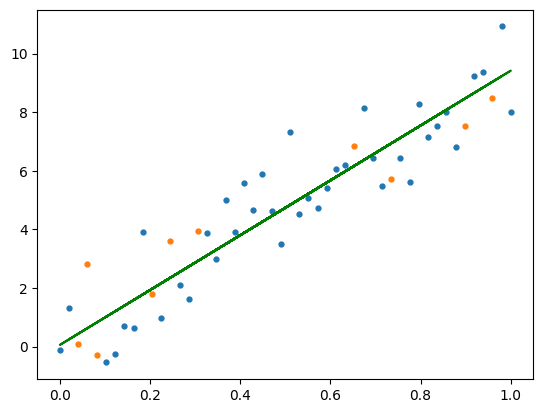

In [12]:
###### plot fig
line = w[0] + w[1]*train_x[:,1]

fig, ax = plt.subplots()

plt.plot(train_x[:,1], train_y, '.', markersize =7)
plt.plot(test_x[:,1], test_y, '.', markersize =7)
l,  = plt.plot(train_x[:,1], line, 'green', markersize = 3)
# now add individual line for each point
for i in range(len(train_x[:,1])):
    lineXdata = (train_x[:,1][i], train_x[:,1][i]) # same X
    lineYdata = (train_y[i], line[i]) # different Y
    plt.plot(lineXdata, lineYdata, 'tab:blue', '-',markersize = 1)

plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-2, 10)
plt.legend(['Train Data', 'Test Data', 'Fit'])
plt.savefig('fit.pdf')

## **Polynomial Regression**
---
We saw in the lecture that when the relationship is not linear, we need a more expressive approach technique to sufficiently model the data.

Simple polynomial model:
$$y = \beta_0 + \beta_1x + \beta_2x^2$$

If $X = [1 \quad x_1 \quad x_1^2]$, then $y = \beta X$ and there is the following closed form solution:

$$\hat{\beta} = (X^TX)^{-1}X^Ty$$

### On linear data

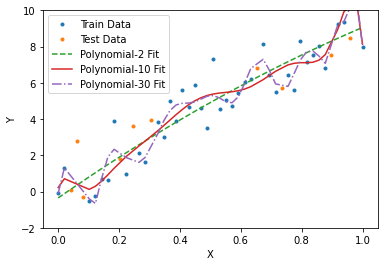

In [ ]:
# polynomial fit of order 2

z = np.polyfit(train_x[:,1], train_y[:,0], 2)
p = np.poly1d(z)

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    p10 = np.poly1d(np.polyfit(train_x[:,1], train_y[:,0], 10))

with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    p30 = np.poly1d(np.polyfit(train_x[:,1], train_y[:,0], 30))

sort_inds = np.argsort(train_x[:,1])
train_x_sorted = train_x[sort_inds,1]
train_y_sorted = train_y[sort_inds]

fig, ax = plt.subplots()

_ = plt.plot(train_x_sorted, train_y_sorted, '.', 
             test_x[:,1], test_y, '.',
             train_x_sorted, p(train_x_sorted), '--', train_x_sorted, p10(train_x_sorted), '-',
             train_x_sorted, p30(train_x_sorted), '-.')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-2, 10)
plt.legend(['Train Data', 'Test Data', 'Polynomial-2 Fit', 'Polynomial-10 Fit', 'Polynomial-30 Fit'])
plt.savefig('fit_polynomial.pdf')

plt.show()

### On polynomial data

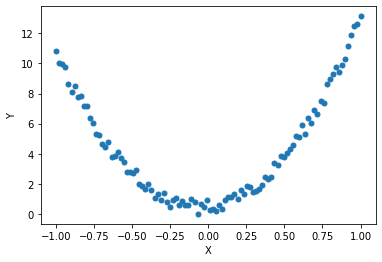

<Figure size 432x288 with 0 Axes>

In [ ]:
# create the data
num_samples = 100
x = np.linspace(-4., 4.0, num_samples)[:, None]
y = 0.3*x + 0.7*x**2  + np.random.rand(num_samples)[:,None]
# normalize for stability
x /= x.max()

# plot the data
plt.plot(x, y, 'o', markersize =5)
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('second_order_data.pdf')

plt.show()
plt.clf()

[[1.19377691]]


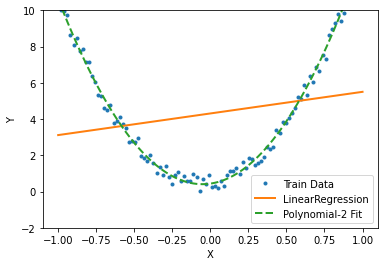

In [ ]:
# polynomial fit of order 2

z = np.polyfit(x[:,0], y[:,0], 2)
p = np.poly1d(z)

from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(x,y)
coeffs = regression.coef_
intercept = regression.intercept_
print(coeffs)
line = coeffs * x + intercept

fig, ax = plt.subplots()

_ = plt.plot(x,y, '.')
plt.plot( 
             x, line, '-', 
             x, p(x), '--', linewidth =2)
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(-2, 10)
plt.legend(['Train Data', 'LinearRegression', 'Polynomial-2 Fit'])
plt.savefig('fit_polynomial_2.pdf')

plt.show()

## Outliers

In [ ]:
# create the data
num_samples = 100
x = np.linspace(0., 10.0, num_samples)[:, None]
y = 0.8*np.sin(x) + 0.1*x**2 + 0.7*np.random.randn(num_samples,1)

# normalize for stability
x /= x.max()

In [ ]:
# fit
regression = LinearRegression().fit(x,y)
coeffs = regression.coef_
intercept = regression.intercept_
print(coeffs)
line = coeffs * x + intercept

[[10.2244412]]


In [ ]:
# add outliers

y[20] = 5
y[0] = 3
regression = LinearRegression().fit(x,y)
coeffs = regression.coef_
intercept = regression.intercept_
print(coeffs)
line_a = coeffs * x + intercept

[[9.92522269]]


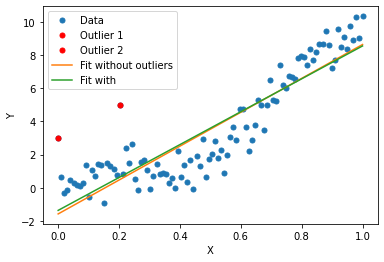

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot
plt.plot(x, y, 'o', markersize =5)
plt.plot(x[20], y[20],  'or', markersize = 5)
plt.plot(x[0], y[0],  'or', markersize = 5)
plt.plot(x, line)
plt.plot(x, line_a)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Data', 'Outlier 1', 'Outlier 2','Fit without outliers', 'Fit with'])
plt.savefig('outlier.pdf')

plt.show()
plt.clf()

We can identify outliers via residual plots

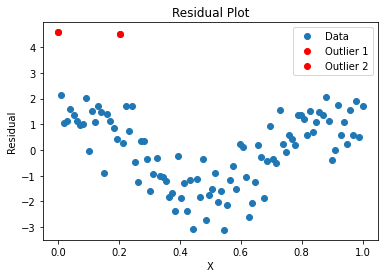

In [ ]:
fig, ax = plt.subplots()
residuals = y-line
plt.plot(x,residuals, 'o')
plt.plot(x[0], residuals[0], 'or')
plt.plot(x[20], residuals[20], 'or')
plt.title("Residual Plot")
plt.xlabel("X")
plt.ylabel("Residual")
plt.legend(['Data', 'Outlier 1', 'Outlier 2'])
plt.savefig('residuals.pdf')

### Fit with high-leverage points

High-leverage points: Points where the prediction is very large compared to other observations. High-leverage points have no neighboring points, which makes the fitted model likely to pass close to a high leverage observation and thus probably cause large changes in the parameter estimates.

[[9.73014386]]
[[7.34473717]]


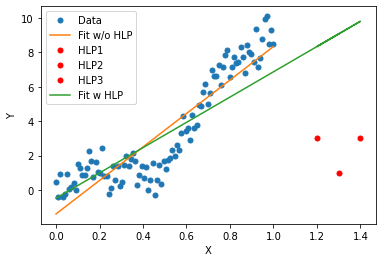

<Figure size 432x288 with 0 Axes>

In [ ]:
# create the data
num_samples = 100
x = np.linspace(0., 10.0, num_samples)[:, None]
y = 0.8*np.sin(x) + 0.1*x**2 + 0.7*np.random.randn(num_samples,1)

# normalize for stability
x /= x.max()

regression = LinearRegression().fit(x,y)
coeffs = regression.coef_
intercept = regression.intercept_
print(coeffs)
line = coeffs * x + intercept

# plot the data
fig, ax = plt.subplots()

plt.plot(x, y, 'o', markersize =5)
plt.plot(x, line)

x[-1] =1.3
y[-1] = 1

x[-2] =1.2
y[-2] = 1.5

x[-3] = 1.4
y[-3]=3
regression = LinearRegression().fit(x,y)
coeffs = regression.coef_
intercept = regression.intercept_
print(coeffs)
line_a = coeffs * x + intercept


plt.plot(x[-1], y[-1],  'or', markersize = 5)
plt.plot(x[-2], y[-3],  'or', markersize = 5)
plt.plot(x[-3], y[-3],  'or', markersize = 5)

plt.plot(x, line_a)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Data', 'Fit w/o HLP','HLP1', 'HLP2', 'HLP3',  'Fit w HLP'])
plt.savefig('hlp.pdf')

plt.show()
plt.clf()

Leverage of each instance is calculated by $$h_i = \frac{1}{N} + \frac{(x_i - \bar{x}_i)^2}{\sum_{j=1}^N(x_j - \bar{x})^2}$$

The average value of $h$ is $\bar{h} = \frac{p + 1}{N}$, where p is the order of the polynomial ($p=1$ for linear regression).

If $h_i >> \bar{h}$, observation $i$ might be a high leverage point.